# **Time Frequency (TF) Analysis**

Learning and testing TF functions to analyse non-stationary signals.

### Test 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tftb
from tftb.generators import amgauss, fmlin

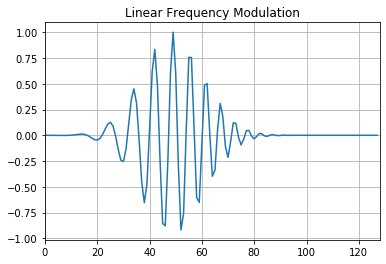

In [13]:
z = amgauss(128, 50.0, 30.0) * fmlin(128, 0.05, 0.3, 50)[0]
plt.plot(np.real(z))
plt.xlim(0, 128)
plt.grid()
plt.title('Linear Frequency Modulation')
plt.show()

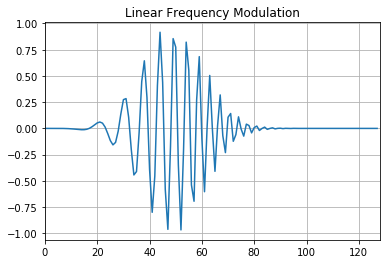

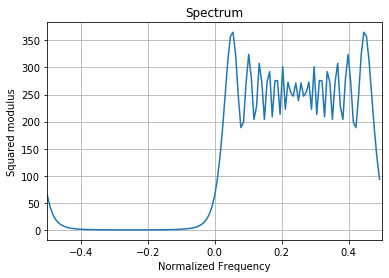

In [20]:
n_points = 128
fmin, fmax = 0.0, 0.5
signal, _ = fmlin(n_points, fmin, fmax)

plt.plot(np.real(amgauss(128, 50.0, 30.0) * signal))
plt.xlim(0, 128)
plt.grid()
plt.title('Linear Frequency Modulation')
plt.show()


# Plot the energy spectrum of the chirp

dsp1 = np.fft.fftshift(np.abs(np.fft.fft(signal)) ** 2)
plt.plot(np.arange(-64, 64, dtype=float) / 128.0, dsp1)
plt.xlim(-0.5, 0.5)
plt.title('Spectrum')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

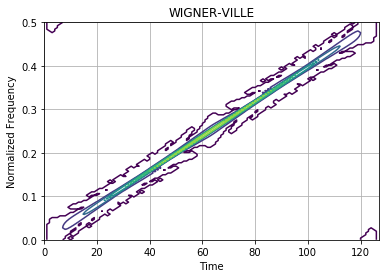

In [22]:
from tftb.processing import WignerVilleDistribution
wvd = WignerVilleDistribution(signal)
wvd.run()
wvd.plot(kind='contour', extend=[0, n_points, fmin, fmax])

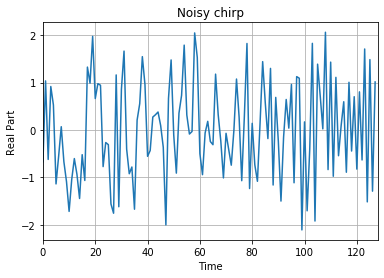

In [30]:
from tftb.generators import sigmerge, noisecg
noisy_signal = sigmerge(signal, noisecg(128), 0)
plt.plot(np.real(noisy_signal))
plt.xlim(0, 128)
plt.title('Noisy chirp')
plt.ylabel('Real Part')
plt.xlabel('Time')
plt.grid()
plt.show()

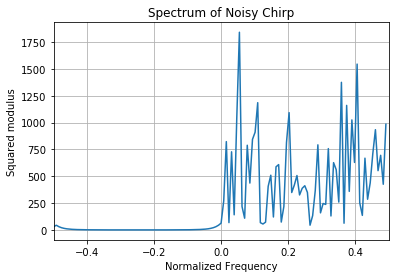

In [31]:
# Enery spectrum of the noisy chirp.

dsp1 = np.fft.fftshift(np.abs(np.fft.fft(noisy_signal)) ** 2)
plt.plot(np.arange(-64, 64, dtype=float) / 128.0, dsp1)
plt.xlim(-0.5, 0.5)
plt.title('Spectrum of Noisy Chirp')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

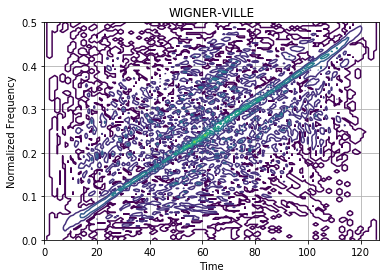

In [33]:
wvd = WignerVilleDistribution(noisy_signal)
wvd.run()
wvd.plot(kind='contours')

### Test 2

In [35]:
import os

In [36]:
os.getcwd()

'C:\\Users\\ferna\\Desktop\\PenDriveBcom\\Implementations_codes'

## **Time frequency analysis**

Spectrogram from Scipy library

In [155]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [156]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

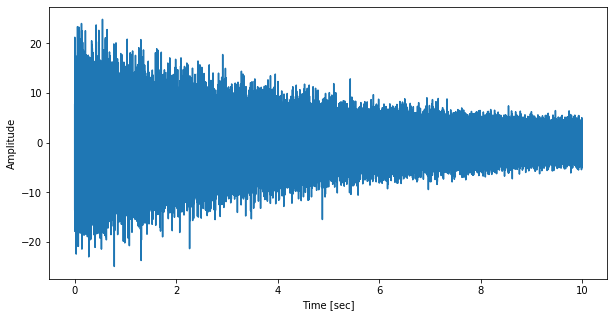

In [157]:
plt.plot(time, x)
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]')
plt.show()

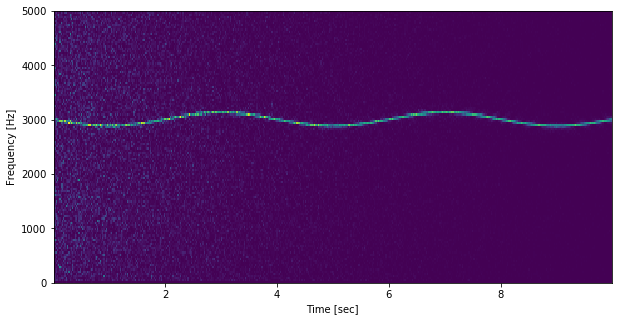

In [158]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()